In [2]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

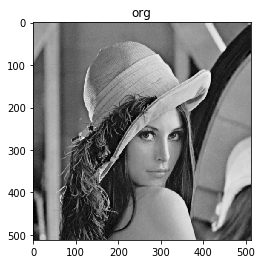

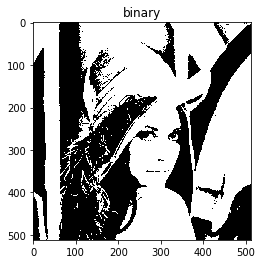

In [26]:
image = cv2.imread('images/Lena.png', 0) # 0은 흑백
imshow('org', image)

thr, mask = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)
imshow('binary', mask)

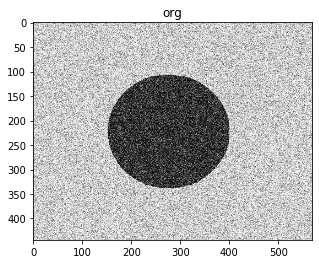

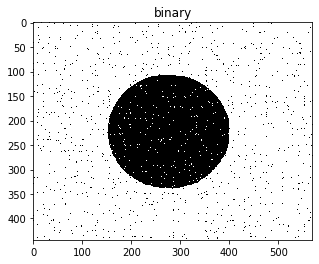

In [31]:
image = cv2.imread('images/circle.png', 0)
imshow('org', image)

_, binary = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)
imshow('binary', binary)

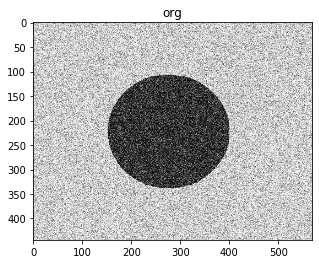

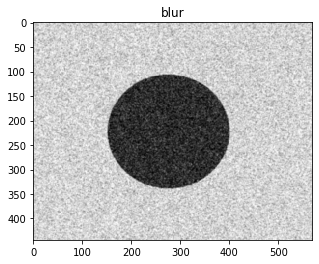

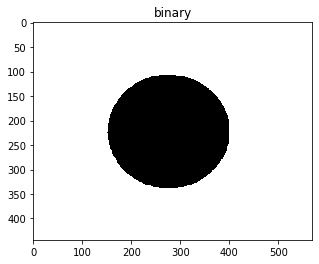

In [40]:
image = cv2.imread('images/circle.png', 0)
imshow('org', image)

img_blur = cv2.GaussianBlur(image, (5,5), 0)
imshow('blur', img_blur)

_, binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)
imshow('binary', binary)

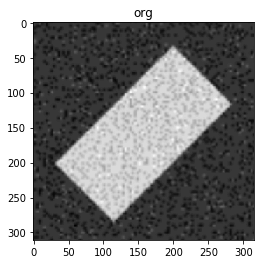

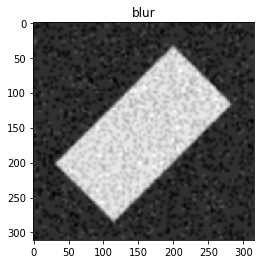

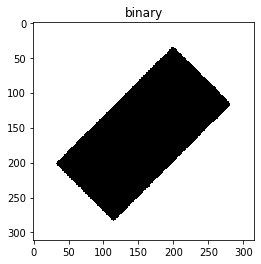

In [43]:
image = cv2.imread('images/boxnoise.png', 0)
imshow('org', image)

img_blur = cv2.GaussianBlur(image, (5,5), 0)
imshow('blur', img_blur)

_, binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)
imshow('binary', binary)

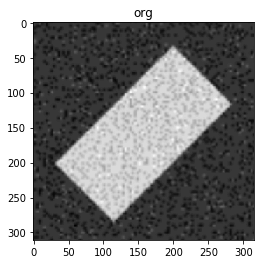

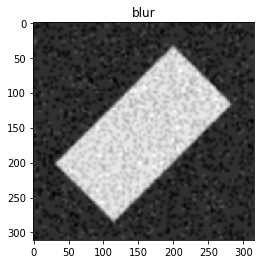

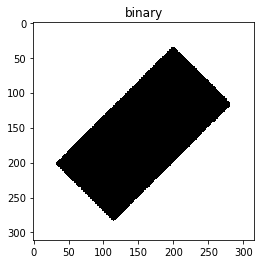

In [44]:
image = cv2.imread('images/boxnoise.png', 0)
imshow('org', image)

img_blur = cv2.GaussianBlur(image, (5,5), 0)
imshow('blur', img_blur)

_, binary = cv2.threshold(img_blur,
                          0, 255,
                          cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('binary', binary)

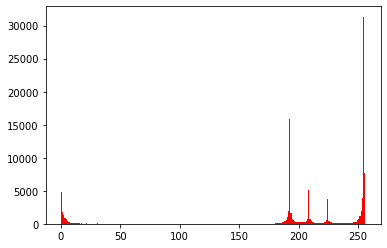

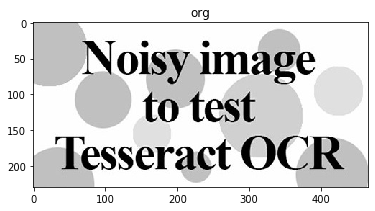

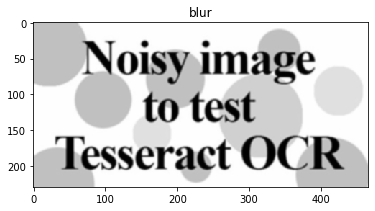

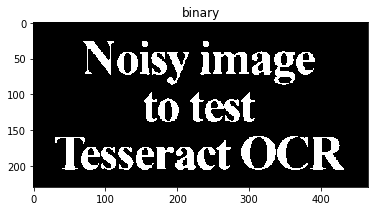

In [49]:
image = cv2.imread('images/noisetext.jpg', 0)
plt.hist(image.ravel(), 256, [0,256], color='r');
plt.show()
imshow('org', image)

img_blur = cv2.GaussianBlur(image, (5,5), 0)
imshow('blur', img_blur)

_, binary = cv2.threshold(img_blur,
                          0, 255,
                          cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('binary', binary)

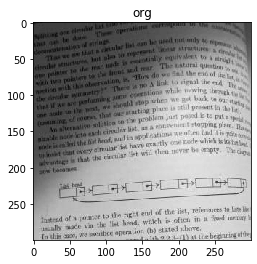

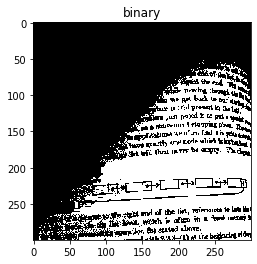

In [59]:
image = cv2.imread('images/text.jpg', 0)
imshow('org', image)

_, binary = cv2.threshold(image,
                          127, 255,
                          cv2.THRESH_BINARY)
imshow('binary', binary)

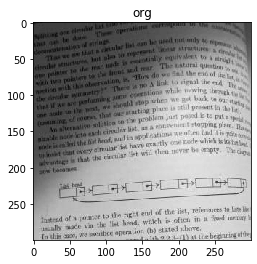

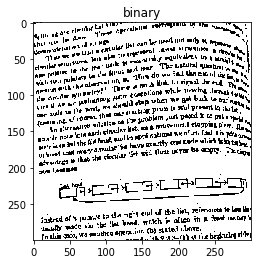

In [82]:
image = cv2.imread('images/text.jpg', 0)
imshow('org', image)

binary = cv2.adaptiveThreshold(
    image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 21, 7
    # 21*21로 분할
    # 2: 평균값에서 2만큼 빼서 분할
)
imshow('binary', binary)

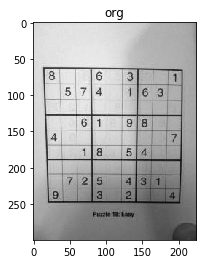

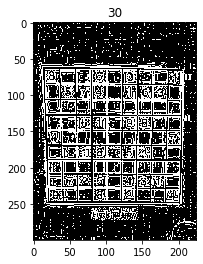

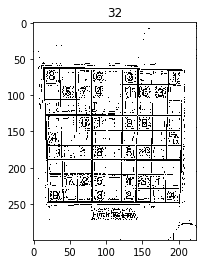

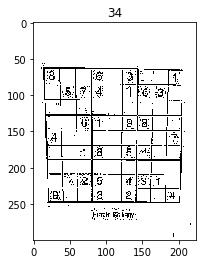

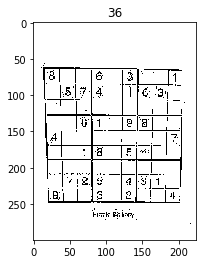

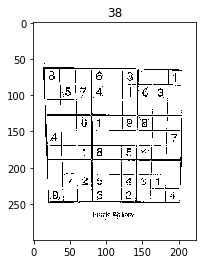

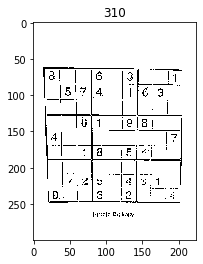

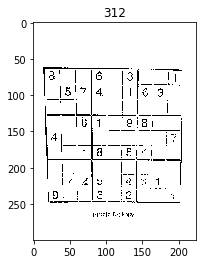

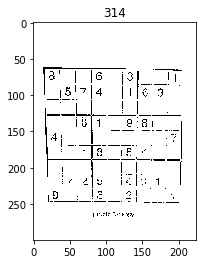

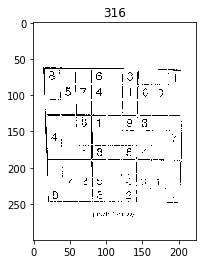

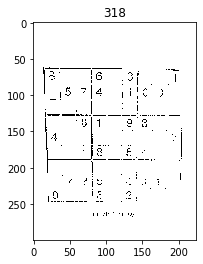

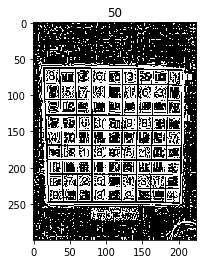

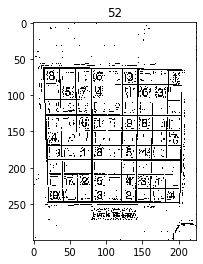

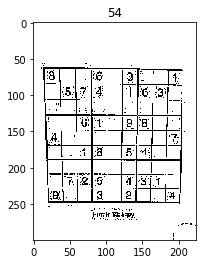

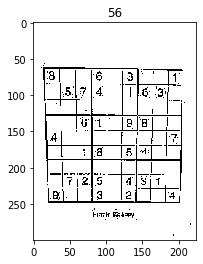

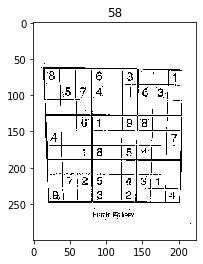

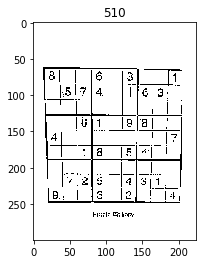

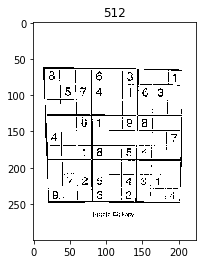

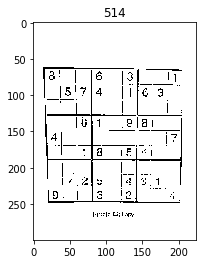

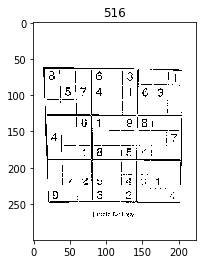

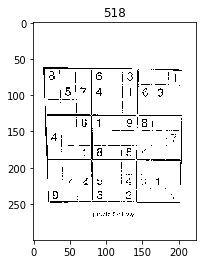

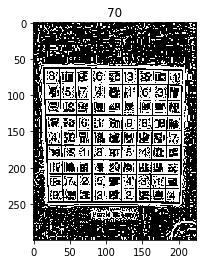

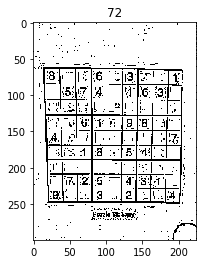

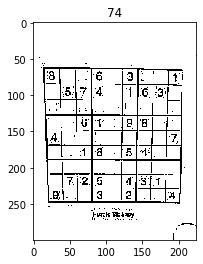

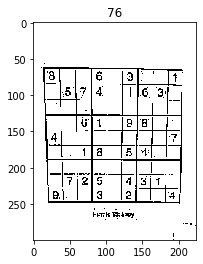

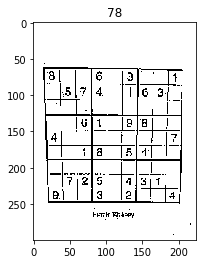

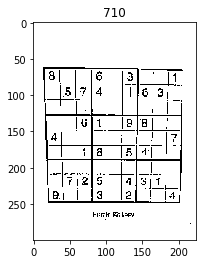

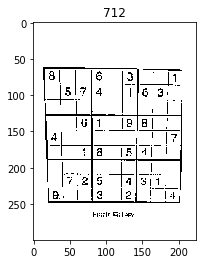

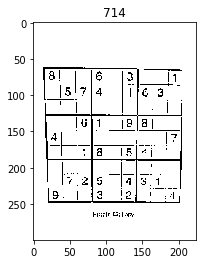

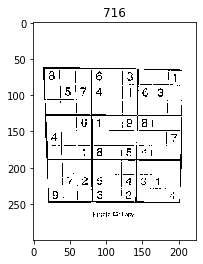

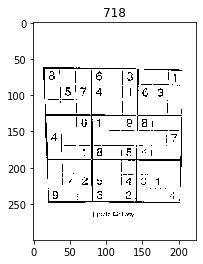

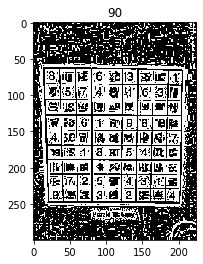

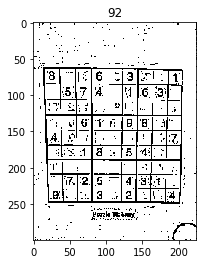

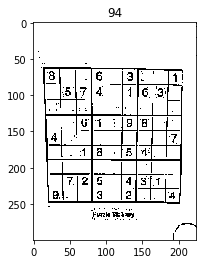

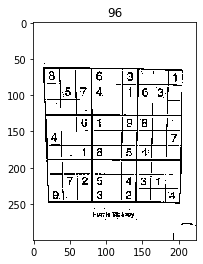

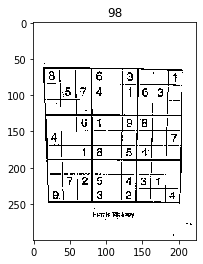

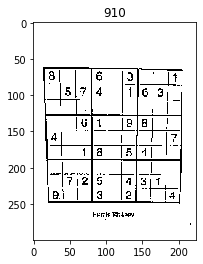

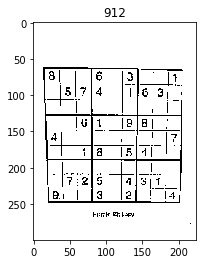

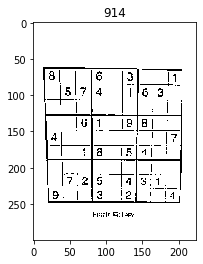

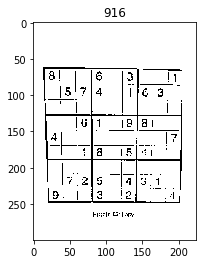

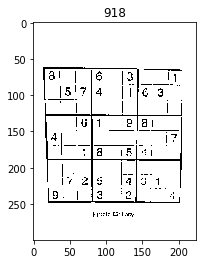

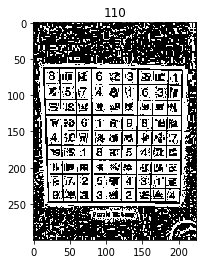

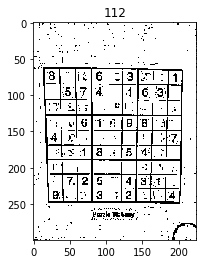

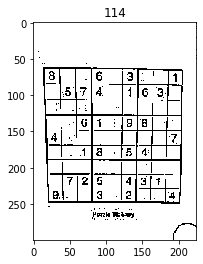

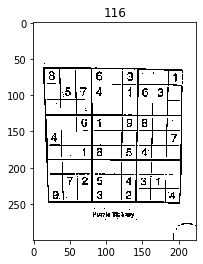

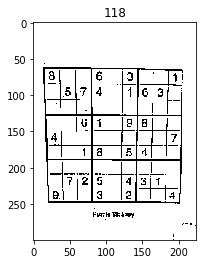

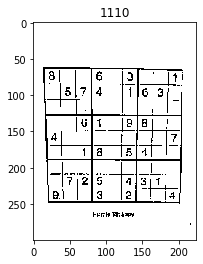

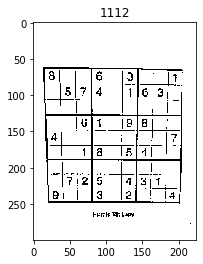

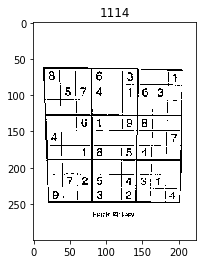

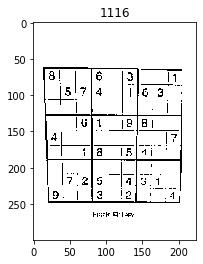

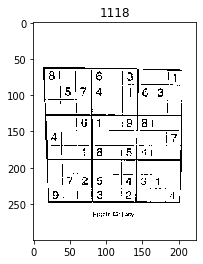

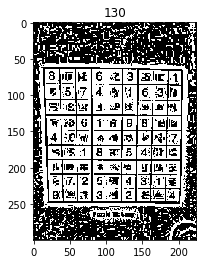

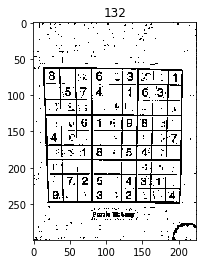

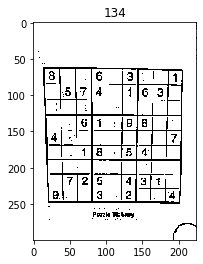

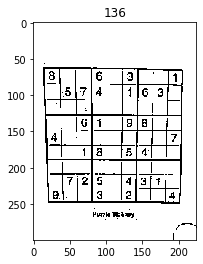

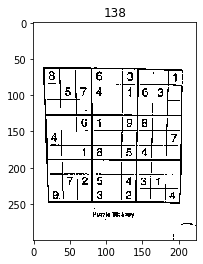

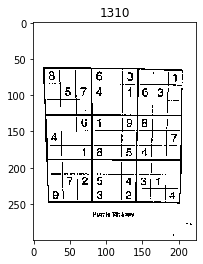

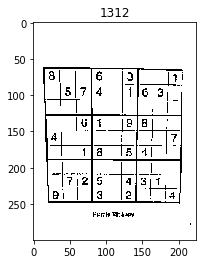

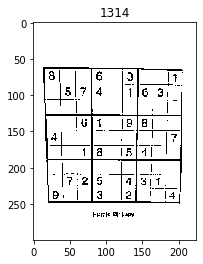

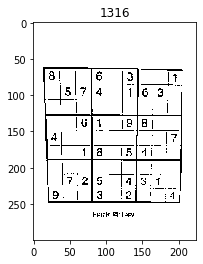

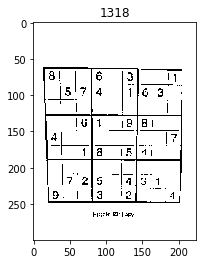

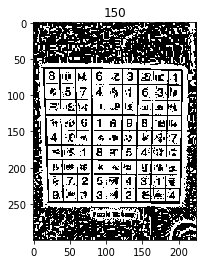

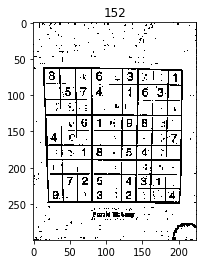

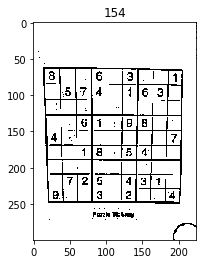

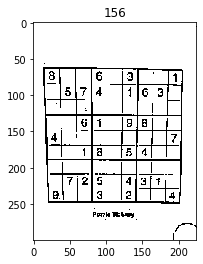

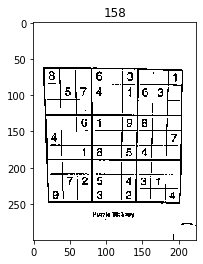

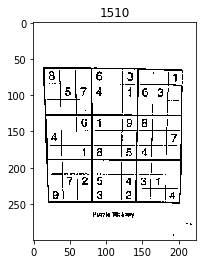

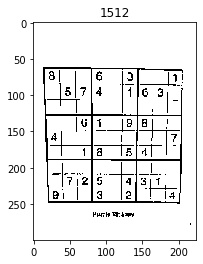

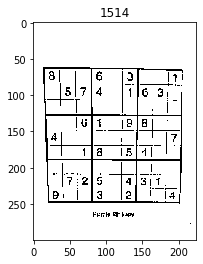

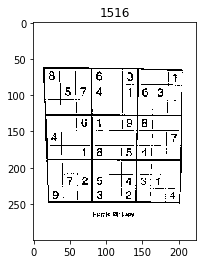

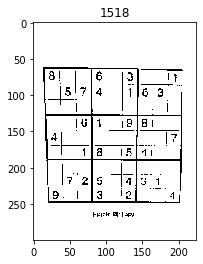

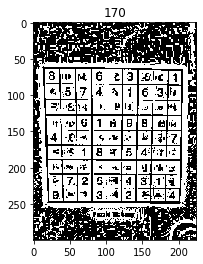

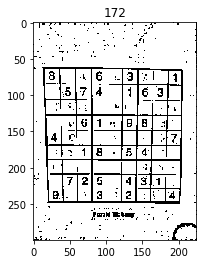

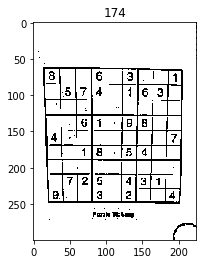

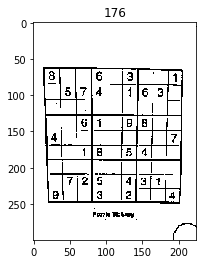

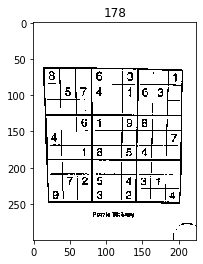

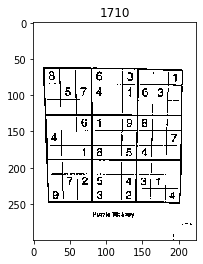

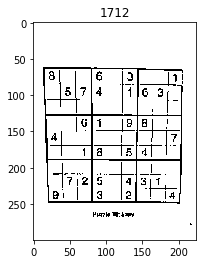

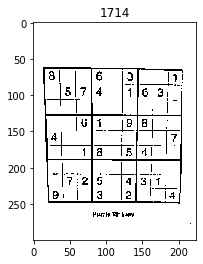

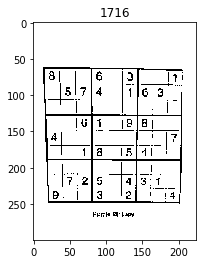

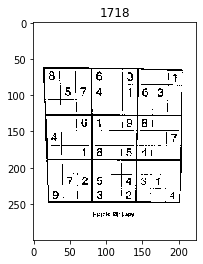

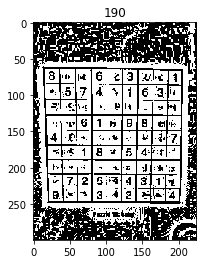

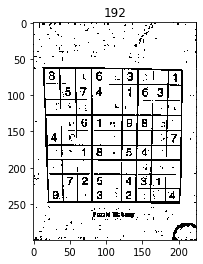

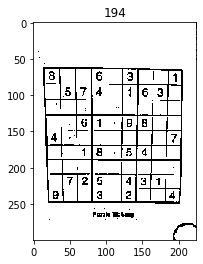

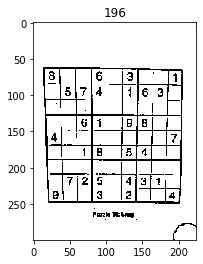

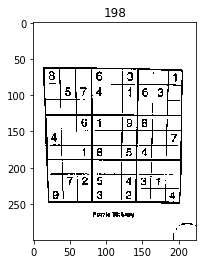

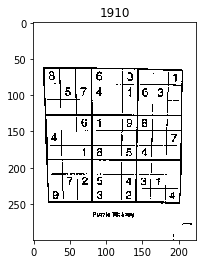

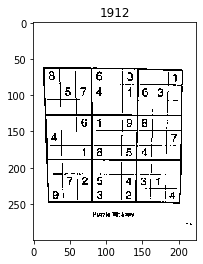

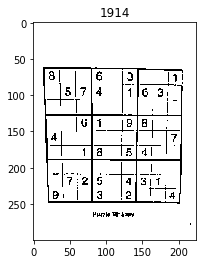

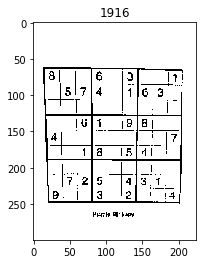

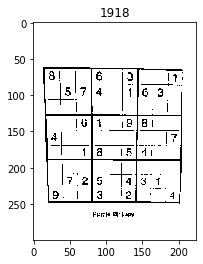

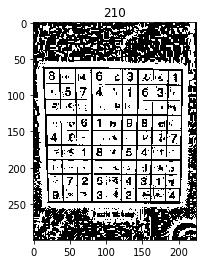

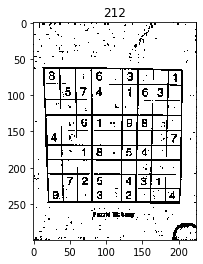

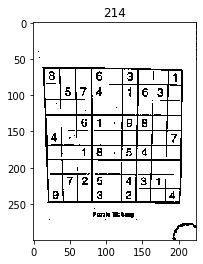

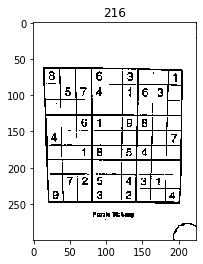

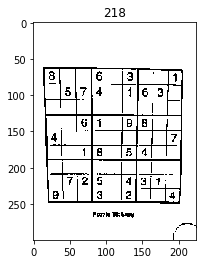

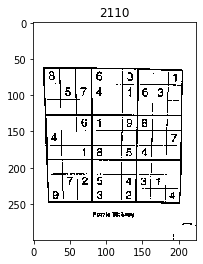

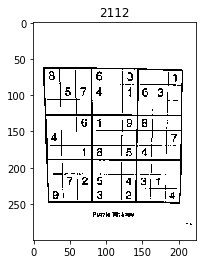

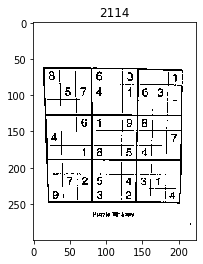

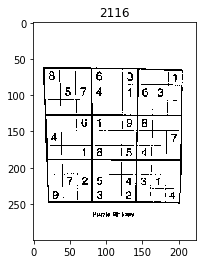

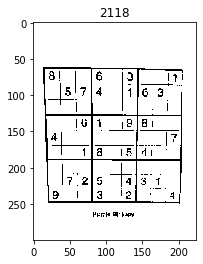

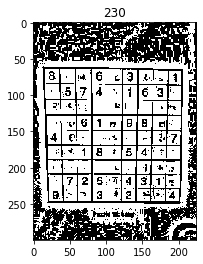

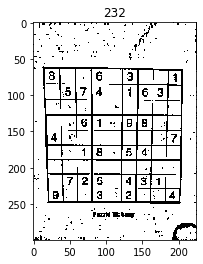

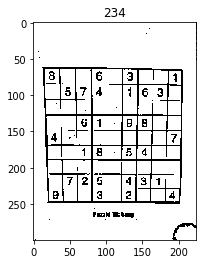

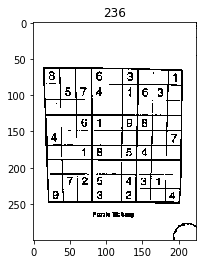

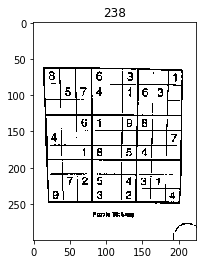

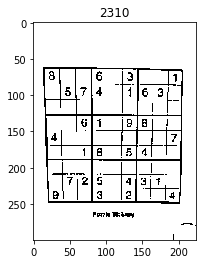

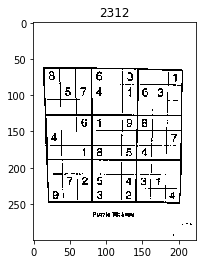

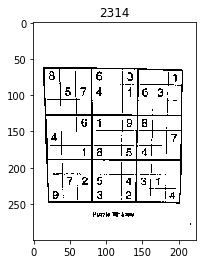

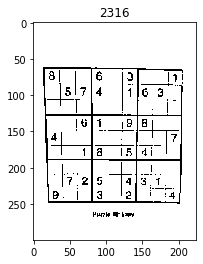

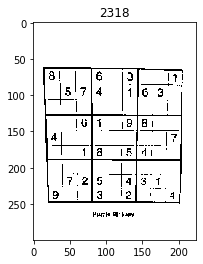

In [99]:
image = cv2.imread('images/grid.jpg', 0)
imshow('org', image)
for i in range(3,25,2):
    for j in range(0, 20, 2):
        binary = cv2.adaptiveThreshold(
            image, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, i, j
            # 21*21로 분할
            # 2: 평균값에서 2만큼 빼서 분할
        )
        imshow(f'{i}{j}', binary)

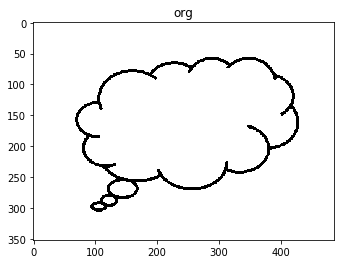

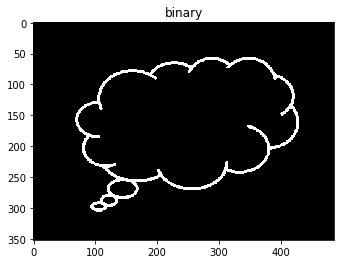

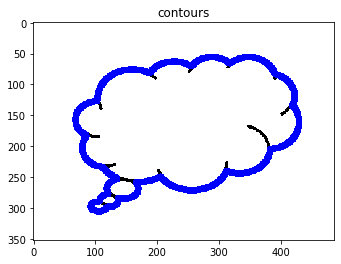

In [110]:
image = cv2.imread('images/cloud.png', 0)
imshow('org', image)

_, bin_img = cv2.threshold(
    image,
    0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)
imshow('binary', bin_img)

contours, _ = cv2.findContours(
    bin_img,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    # 최 외각선
)

cnt_img = cv2.drawContours(
    cv2.imread('images/cloud.png'),
    contours, -1, (255,0,0), 10)
imshow('contours', cnt_img)

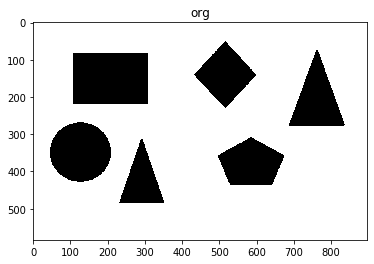

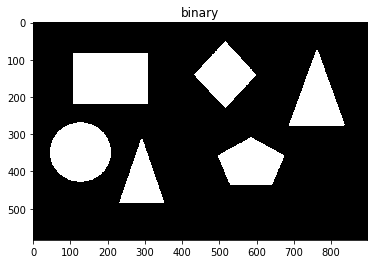

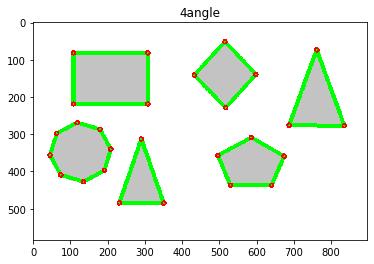

In [154]:
image = cv2.imread('images/shape3.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('org', gray)

_, bin_img = cv2.threshold(gray, 0, 255,
                           cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('binary', bin_img)

contours, _ = cv2.findContours(bin_img,
                               cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
                               #최 외각선
for cnt in contours:
    peri = cv2.arcLength(cnt, True) # 선분 길이, 폐곡선=True
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True) # 꼭지점만 리턴해줌
    
    cv2.drawContours(image,
                     [approx], -1, (0,255,0), 10)
    
    for app in approx:
        x = app[0][0]
        y = app[0][1]
        cv2.circle(image, (x,y), 5, (0,0,255), 3)
    
imshow(f'{len(approx)}angle', image)

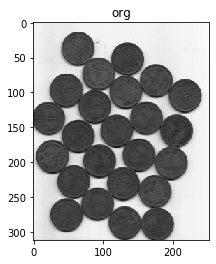

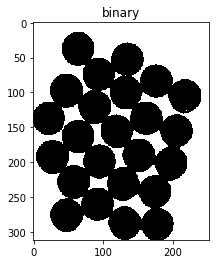

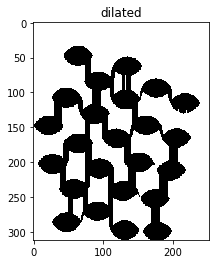

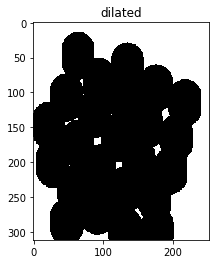

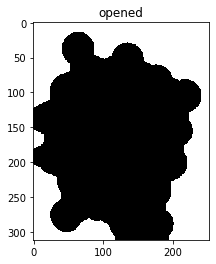

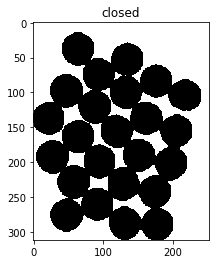

In [173]:
image = cv2.imread('images/water_coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('org', gray)

_, bin_img = cv2.threshold(gray, 127, 255,
                           cv2.THRESH_BINARY)
imshow('binary', bin_img)

dilated = cv2.morphologyEx(bin_img,
                         cv2.MORPH_DILATE, (3,3), iterations=20)
imshow('dilated', dilated)

eroded = cv2.morphologyEx(bin_img,
                         cv2.MORPH_ERODE, (3,3), iterations=20)
imshow('dilated', eroded)

# 침식후 팽창
opened = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN,
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                          iterations=5)
imshow('opened', opened)

# 팽창후 침식
closed = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE,
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                          iterations=5)
imshow('closed', closed)

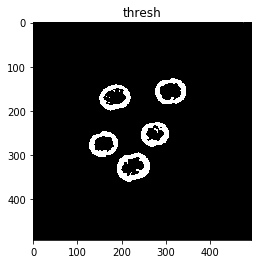

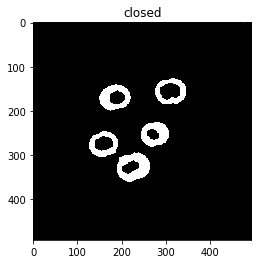

In [185]:
frame = cv2.imread('images/coin.png')
roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (7,7), 0)

thresh = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV, 45, 6)
imshow('thresh', thresh)

closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                          iterations=5)
imshow('closed', closed)

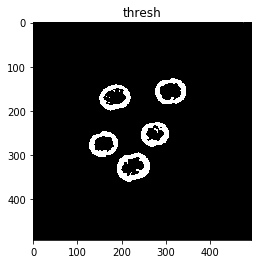

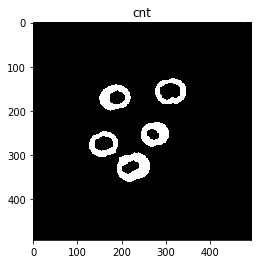

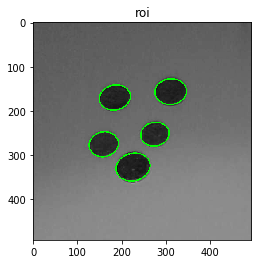

In [192]:
cnt_img = closed.copy()
contours, _ = cv2.findContours(cnt_img,
                               cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)
    
imshow('thresh', thresh)
imshow('cnt', cnt_img)
imshow('roi', roi)

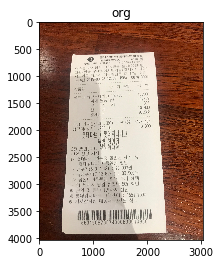

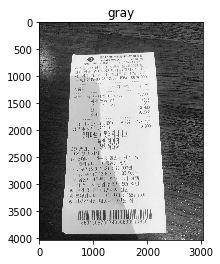

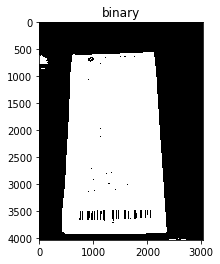

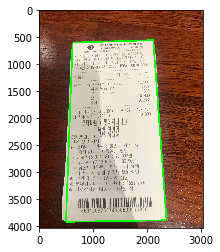

True

In [235]:
image = cv2.imread('images/mart2.jpg')
imshow('org', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('gray', gray)

blur1 = cv2.medianBlur(gray, 21)

blur2 = cv2.GaussianBlur(blur1, (21,21), 0)

_, binary = cv2.threshold(blur2,
                          0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('binary', binary)


contours, _ = cv2.findContours(binary,
                               cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
for cnt in contours:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
    
    if len(approx) == 4:
        cv2.drawContours(image,
                         [approx], -1, (0,255,0), 30)
    
        for app in approx:
            x = app[0][0]
            y = app[0][1]
            cv2.circle(image, (x,y), 5, (0,0,255), 3)
        
imshow('', image)
cv2.imwrite('output.png', image)